Crétion du réseau de neurones

In [2]:
import keras 
import tensorflow as tf

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(32, 32,3)))
for i in range(20):
    model.add(keras.layers.Dense(100,kernel_initializer = "he_normal", activation = "swish"))
model.add(keras.layers.Dense(10,activation="softmax"))


In [3]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [11]:
X_train.shape

(50000, 32, 32, 3)

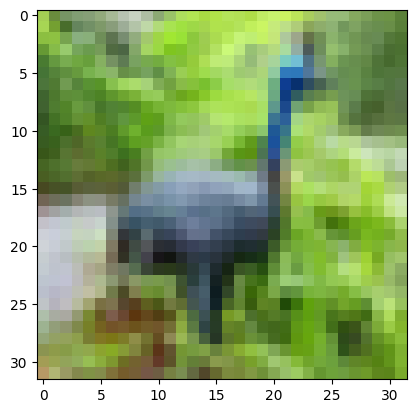

In [12]:
import matplotlib.pyplot as plt

plt.imshow(X_train[6])

In [5]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

In [14]:
tensorboard_cb = keras.callbacks.TensorBoard(log_dir = run_logdir,profile_batch=(100,200))
optimizer = keras.optimizers.Nadam()
early_stopping_cb = keras.callbacks.EarlyStopping(patience=11)
lr = keras.callbacks.ReduceLROnPlateau(factor=0.5,patience = 5)

In [15]:
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


In [16]:
history = model.fit(X_train,y_train,validation_split=0.2,epochs=50,callbacks=[tensorboard_cb,early_stopping_cb,lr])

Epoch 1/50
1250/1250 [==============================] - 20s 11ms/step - loss: 2.7739 - accuracy: 0.2112 - val_loss: 2.0000 - val_accuracy: 0.2452 - lr: 0.0010
Epoch 2/50
1250/1250 [==============================] - 14s 11ms/step - loss: 1.9212 - accuracy: 0.2920 - val_loss: 1.8920 - val_accuracy: 0.3187 - lr: 0.0010
Epoch 3/50
1250/1250 [==============================] - 15s 12ms/step - loss: 1.8631 - accuracy: 0.3181 - val_loss: 1.8761 - val_accuracy: 0.3091 - lr: 0.0010
Epoch 4/50
1250/1250 [==============================] - 14s 11ms/step - loss: 1.8326 - accuracy: 0.3355 - val_loss: 1.8283 - val_accuracy: 0.3324 - lr: 0.0010
Epoch 5/50
1250/1250 [==============================] - 14s 11ms/step - loss: 1.8021 - accuracy: 0.3440 - val_loss: 1.8454 - val_accuracy: 0.3421 - lr: 0.0010
Epoch 6/50
1250/1250 [==============================] - 14s 11ms/step - loss: 1.7851 - accuracy: 0.3517 - val_loss: 1.7630 - val_accuracy: 0.3612 - lr: 0.0010
Epoch 7/50
1250/1250 [========================

AVEC BN

In [19]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=(32, 32,3)))
for i in range(19):
    model1.add(keras.layers.Dense(100,kernel_initializer = "he_normal"))
    model1.add(keras.layers.BatchNormalization())
    model1.add(keras.layers.Activation("swish"))
model1.add(keras.layers.Dense(100,kernel_initializer = "he_normal"))
model1.add(keras.layers.Dense(10,activation="softmax"))

tensorboard_cb = keras.callbacks.TensorBoard(log_dir = run_logdir,profile_batch=(100,200))
optimizer = keras.optimizers.Nadam()
early_stopping_cb = keras.callbacks.EarlyStopping(patience=11)
lr = keras.callbacks.ReduceLROnPlateau(factor=0.5,patience = 5)

model1.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history1 = model1.fit(X_train,y_train,validation_split=0.2,epochs=50,callbacks=[tensorboard_cb,early_stopping_cb,lr])

Epoch 1/50
1250/1250 [==============================] - 35s 17ms/step - loss: 1.9923 - accuracy: 0.2738 - val_loss: 2.0049 - val_accuracy: 0.3034 - lr: 0.0010
Epoch 2/50
1250/1250 [==============================] - 20s 16ms/step - loss: 1.7542 - accuracy: 0.3696 - val_loss: 1.8669 - val_accuracy: 0.3441 - lr: 0.0010
Epoch 3/50
1250/1250 [==============================] - 20s 16ms/step - loss: 1.6654 - accuracy: 0.4025 - val_loss: 1.8274 - val_accuracy: 0.3609 - lr: 0.0010
Epoch 4/50
1250/1250 [==============================] - 20s 16ms/step - loss: 1.6093 - accuracy: 0.4288 - val_loss: 1.7569 - val_accuracy: 0.3865 - lr: 0.0010
Epoch 5/50
1250/1250 [==============================] - 21s 17ms/step - loss: 1.5617 - accuracy: 0.4459 - val_loss: 1.9418 - val_accuracy: 0.3442 - lr: 0.0010
Epoch 6/50
1250/1250 [==============================] - 21s 17ms/step - loss: 1.5108 - accuracy: 0.4672 - val_loss: 1.6102 - val_accuracy: 0.4262 - lr: 0.0010
Epoch 7/50
1250/1250 [========================

In [26]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=(32, 32,3)))
for i in range(20):
    model2.add(keras.layers.Dense(100,kernel_initializer = "lecun_normal",activation="selu"))
model2.add(keras.layers.Dense(10,activation="softmax"))

run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(log_dir = run_logdir,profile_batch=(100,200))
optimizer = keras.optimizers.Nadam(learning_rate=0.0001)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=11)
lr = keras.callbacks.ReduceLROnPlateau(factor=0.5,patience = 5)


model2.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

history1 = model2.fit(X_train_scaled,y_train,validation_split=0.2,epochs=50,callbacks=[early_stopping_cb,lr,tensorboard_cb])

Epoch 1/50
1250/1250 [==============================] - 23s 13ms/step - loss: 1.8360 - accuracy: 0.3463 - val_loss: 1.7253 - val_accuracy: 0.3872 - lr: 1.0000e-04
Epoch 2/50
1250/1250 [==============================] - 16s 12ms/step - loss: 1.6188 - accuracy: 0.4196 - val_loss: 1.6167 - val_accuracy: 0.4308 - lr: 1.0000e-04
Epoch 3/50
1250/1250 [==============================] - 16s 13ms/step - loss: 1.5228 - accuracy: 0.4567 - val_loss: 1.5783 - val_accuracy: 0.4472 - lr: 1.0000e-04
Epoch 4/50
1250/1250 [==============================] - 16s 13ms/step - loss: 1.4481 - accuracy: 0.4873 - val_loss: 1.5426 - val_accuracy: 0.4572 - lr: 1.0000e-04
Epoch 5/50
1250/1250 [==============================] - 18s 14ms/step - loss: 1.3870 - accuracy: 0.5064 - val_loss: 1.5419 - val_accuracy: 0.4579 - lr: 1.0000e-04
Epoch 6/50
1250/1250 [==============================] - 16s 13ms/step - loss: 1.3326 - accuracy: 0.5253 - val_loss: 1.5017 - val_accuracy: 0.4691 - lr: 1.0000e-04
Epoch 7/50
1250/1250 [

In [7]:
from keras.layers import AlphaDropout

model3 = keras.models.Sequential()
model3.add(keras.layers.Flatten(input_shape=(32, 32,3)))
for i in range(20):
    model3.add(keras.layers.Dense(100,kernel_initializer = "lecun_normal",activation="selu"))
model3.add(AlphaDropout(rate=0.1))
model3.add(keras.layers.Dense(10,activation="softmax"))

run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(log_dir = run_logdir,profile_batch=(100,200))
optimizer = keras.optimizers.Nadam(learning_rate=0.0001)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=11)
lr = keras.callbacks.ReduceLROnPlateau(factor=0.5,patience = 5)
checkpoint = keras.callbacks.ModelCheckpoint("my_cifar10_alpha_dropout_model.x", save_best_only=True)


model3.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

history3 = model3.fit(X_train_scaled,y_train,validation_split=0.2,epochs=50,callbacks=[early_stopping_cb,lr,tensorboard_cb,checkpoint])

Epoch 1/50
1249/1250 [============================>.] - ETA: 0s - loss: 1.9809 - accuracy: 0.3032INFO:tensorflow:Assets written to: my_cifar10_alpha_dropout_model.x\assets


INFO:tensorflow:Assets written to: my_cifar10_alpha_dropout_model.x\assets


1250/1250 [==============================] - 21s 12ms/step - loss: 1.9808 - accuracy: 0.3033 - val_loss: 1.7723 - val_accuracy: 0.3839 - lr: 1.0000e-04
Epoch 2/50
1246/1250 [============================>.] - ETA: 0s - loss: 1.6859 - accuracy: 0.4020INFO:tensorflow:Assets written to: my_cifar10_alpha_dropout_model.x\assets


INFO:tensorflow:Assets written to: my_cifar10_alpha_dropout_model.x\assets


1250/1250 [==============================] - 15s 12ms/step - loss: 1.6851 - accuracy: 0.4022 - val_loss: 1.6296 - val_accuracy: 0.4257 - lr: 1.0000e-04
Epoch 3/50
1248/1250 [============================>.] - ETA: 0s - loss: 1.5633 - accuracy: 0.4457INFO:tensorflow:Assets written to: my_cifar10_alpha_dropout_model.x\assets


INFO:tensorflow:Assets written to: my_cifar10_alpha_dropout_model.x\assets


1250/1250 [==============================] - 15s 12ms/step - loss: 1.5631 - accuracy: 0.4460 - val_loss: 1.5840 - val_accuracy: 0.4421 - lr: 1.0000e-04
Epoch 4/50
1250/1250 [==============================] - ETA: 0s - loss: 1.4833 - accuracy: 0.4708INFO:tensorflow:Assets written to: my_cifar10_alpha_dropout_model.x\assets


INFO:tensorflow:Assets written to: my_cifar10_alpha_dropout_model.x\assets


1250/1250 [==============================] - 15s 12ms/step - loss: 1.4833 - accuracy: 0.4708 - val_loss: 1.5744 - val_accuracy: 0.4603 - lr: 1.0000e-04
Epoch 5/50
1246/1250 [============================>.] - ETA: 0s - loss: 1.4177 - accuracy: 0.4945INFO:tensorflow:Assets written to: my_cifar10_alpha_dropout_model.x\assets


INFO:tensorflow:Assets written to: my_cifar10_alpha_dropout_model.x\assets


1250/1250 [==============================] - 15s 12ms/step - loss: 1.4176 - accuracy: 0.4944 - val_loss: 1.5323 - val_accuracy: 0.4722 - lr: 1.0000e-04
Epoch 6/50
1250/1250 [==============================] - 13s 10ms/step - loss: 1.3579 - accuracy: 0.5172 - val_loss: 1.5408 - val_accuracy: 0.4788 - lr: 1.0000e-04
Epoch 7/50
1245/1250 [============================>.] - ETA: 0s - loss: 1.3030 - accuracy: 0.5360INFO:tensorflow:Assets written to: my_cifar10_alpha_dropout_model.x\assets


INFO:tensorflow:Assets written to: my_cifar10_alpha_dropout_model.x\assets


1250/1250 [==============================] - 16s 13ms/step - loss: 1.3036 - accuracy: 0.5358 - val_loss: 1.5304 - val_accuracy: 0.4742 - lr: 1.0000e-04
Epoch 8/50
1248/1250 [============================>.] - ETA: 0s - loss: 1.2593 - accuracy: 0.5498INFO:tensorflow:Assets written to: my_cifar10_alpha_dropout_model.x\assets


INFO:tensorflow:Assets written to: my_cifar10_alpha_dropout_model.x\assets


1250/1250 [==============================] - 15s 12ms/step - loss: 1.2591 - accuracy: 0.5499 - val_loss: 1.5253 - val_accuracy: 0.4911 - lr: 1.0000e-04
Epoch 9/50
1250/1250 [==============================] - 13s 10ms/step - loss: 1.2072 - accuracy: 0.5694 - val_loss: 1.5743 - val_accuracy: 0.4932 - lr: 1.0000e-04
Epoch 10/50
1250/1250 [==============================] - 15s 12ms/step - loss: 1.1667 - accuracy: 0.5823 - val_loss: 1.5964 - val_accuracy: 0.4881 - lr: 1.0000e-04
Epoch 11/50
1250/1250 [==============================] - 16s 13ms/step - loss: 1.1296 - accuracy: 0.5948 - val_loss: 1.6154 - val_accuracy: 0.4932 - lr: 1.0000e-04
Epoch 12/50
1250/1250 [==============================] - 18s 14ms/step - loss: 1.0879 - accuracy: 0.6112 - val_loss: 1.6036 - val_accuracy: 0.4952 - lr: 1.0000e-04
Epoch 13/50
1250/1250 [==============================] - 14s 11ms/step - loss: 1.0506 - accuracy: 0.6250 - val_loss: 1.6637 - val_accuracy: 0.4935 - lr: 1.0000e-04
Epoch 14/50
1250/1250 [======

In [12]:
model4 = keras.models.clone_model(model3)
model4.set_weights(model3.get_weights())

In [24]:
import numpy as np

y_probas = np.stack([model4(X_test_scaled,training = True) for sample in range(100)])
print(y_probas.shape)

(100, 10000, 10)


In [25]:
y_pred_MC = np.mean(y_probas,axis=0)
y_std_MC_class = np.std(y_probas,axis=0)
y_pred_class = model4(X_test_scaled,training = False)
y_pred_MC = np.argmax(y_std_MC_class,axis=1)
y_pred = np.argmax(y_pred_class,axis=1)
accuracy_MC = np.mean([y_pred_MC==y_test.flatten()])
accuracy = np.mean([y_pred==y_test.flatten()])
print(accuracy_MC)
print(accuracy)


print(y_pred_MC)
print(y_test.flatten())
print("y_pred_MC[0] = ",y_pred_MC[0])
print("y_std_MC[0] = ",y_std_MC_class[0])
print("y_pred[0] = ",y_pred[0])



0.4958
0.4972
[3 8 8 ... 3 5 7]
[3 8 8 ... 5 1 7]
y_pred_MC[0] =  3
y_std_MC[0] =  [0.00128662 0.00290014 0.00174352 0.04871127 0.02121467 0.04483201
 0.00104317 0.00237533 0.01042468 0.00327799]
y_pred[0] =  3
